## PAIR PROGRAMMING - VISUALIZACIONES 1

Es el momento de ponernos manos a la obra con la visualización de datos. En este primer ejercicio de pair programming trabajaremos con los csv que generamos en el ejercicio de pair programming de Pandas III, ese en el que habíamos eliminado algunas columnas de nuestro csv.

📌 Para poder solucionar los ejercicios de hoy no solo tendremos que visualizar, también tendremos que usar métodos que hemos aprendido en lecciones anteriores de Pandas como por ejemplo value_counts(), isnull, describe, etc.

1. ¿Cuántos tickets tenemos de cada tipo?

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
open_xml = pd.read_excel('datos/2016_pandasIII.xlsx')

In [4]:
open_xml.head()

,id_ticket,fecha,id_empleado,id_agente,categoría,tipo,severidad,prioridad,días_resolución,satisfacción
0,GDDENR-5042564453,2016-07-13,1735.0,4.0,Acceso&%Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0.0,5.0
1,GDDENR-8042508060,2016-05-18,1566.0,10.0,Acceso&%Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0.0,5.0
2,GDDESR-1342539995,2016-06-18,569.0,29.0,Sistema,Problema,0 - Sin Clasificar,0 - Sin Asignar,3.0,5.0
3,GDDTSR-5942488006,2016-04-28,320.0,40.0,Sistema,Solicitud,0 - Sin Clasificar,0 - Sin Asignar,9.0,5.0
4,GDLEER-0042524120,2016-06-03,1842.0,31.0,Software,Problema,2 - Normal,0 - Sin Asignar,0.0,5.0


In [5]:
open_xml['tipo'].unique()

array(['Problema', 'Solicitud', nan], dtype=object)

In [6]:
#usamos reset_index para convertir serie en df
df_conteo = open_xml['tipo'].value_counts().reset_index()
df_conteo

,index,tipo
0,Solicitud,9756
1,Problema,3294


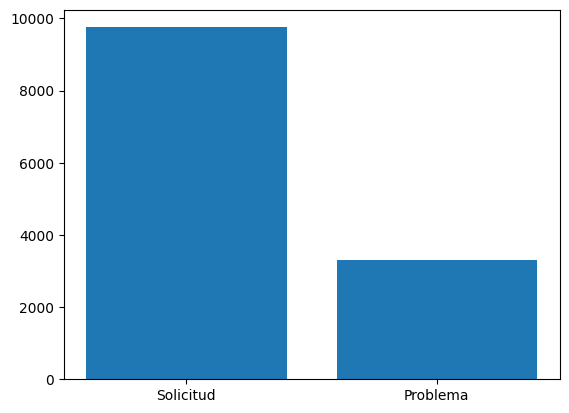

In [7]:
#hacemos barplot

plt.figure()
plt.bar(df_conteo['index'], df_conteo['tipo'])
plt.show()

2. Filtrad los datos para quedarnos solo con los datos de la categoría "Software".

Dentro del conjunto de datos filtrado que acabamos de generar, realiza la mejor visualización para mostrar cuantos tickets tenemos de cada tipo que tenemos (Problema o Solicitud).


In [8]:
# Filtramos para crear un DF cuyo filtro es que solo se tomen los datos de la categoría Software
df_filtro_sf = open_xml[open_xml['categoría'] == 'Software']


In [9]:
# Hemos reducido el dataframe con la información que queremos mostrar: la columna donde se encuentran solicitud y problema

df_filtro_sf_conteo = df_filtro_sf['tipo'].value_counts().reset_index()

In [10]:
df_filtro_sf_conteo

,index,tipo
0,Solicitud,1948
1,Problema,664


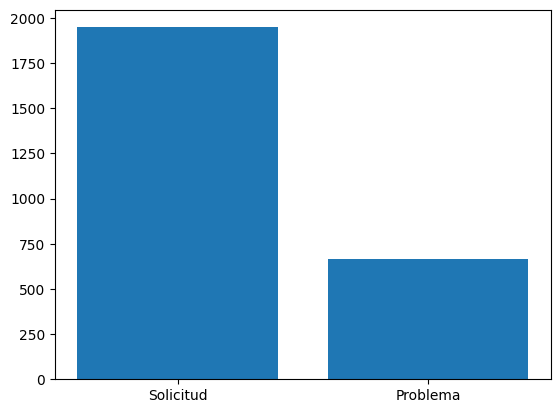

In [11]:
plt.figure()
plt.bar(df_filtro_sf_conteo['index'], df_filtro_sf_conteo['tipo'])
plt.show()

Usando el mismo conjunto de datos filtrado, ¿existe alguna relación entre la satisfacción y los días de resolución?. Poned los nombres de los ejes, siendo el eje x los "días de resolución" y el eje y la "satisfacción".


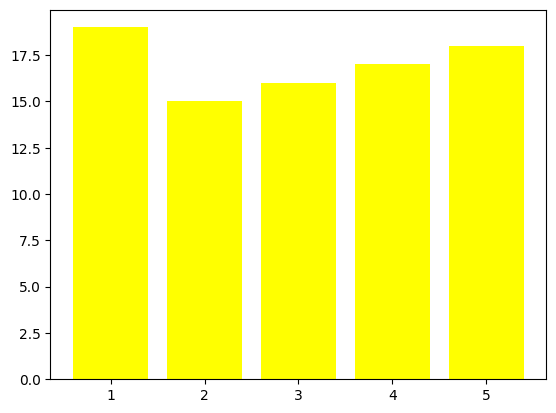

In [26]:
#un gráfico de barras simple. No siempre vamos a necesitar crear sub dataframes. Dependerá de lo que queramos mostrar y hacer con los datos

plt.figure()
plt.bar(df_filtro_sf['satisfacción'], df_filtro_sf['días_resolución'], color = "yellow")
plt.show()

Usando el mismo conjunto de datos filtrado, ¿cuál es la frecuencia de cada una de las satisfacciones que tenemos en el conjunto de datos?

In [18]:
# frecuencia = el número de veces que se repiten cada uno de los valores únicos de las satisfacciones
df_filtro_satisfaccion_sf = df_filtro_sf['satisfacción'].value_counts().reset_index()
df_filtro_satisfaccion_sf
#un histograma sin necesidad de value_counts()

,index,satisfacción
0,5.0,1267
1,4.0,770
2,1.0,308
3,3.0,213
4,2.0,51


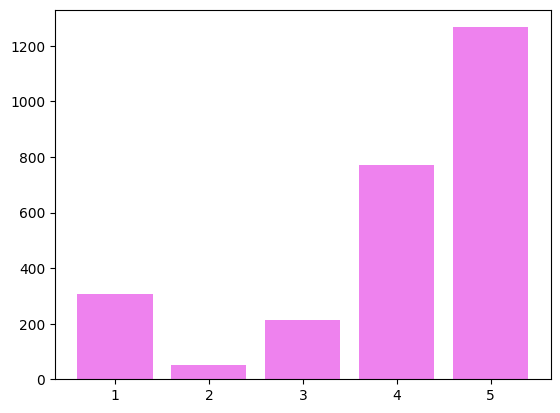

In [30]:
plt.figure()
plt.bar(df_filtro_satisfaccion_sf['index'], df_filtro_satisfaccion_sf['satisfacción'], color = 'violet')
plt.show()

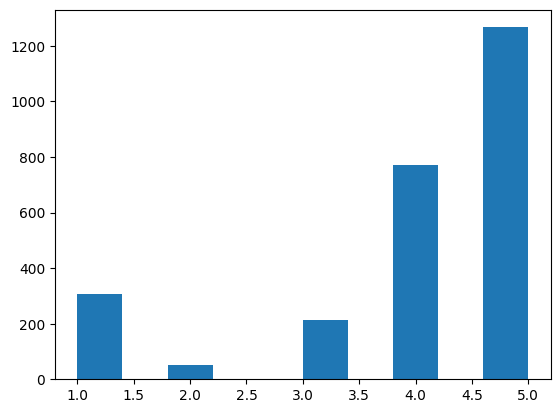

In [28]:
#histograma donde se ve la frecuencia de las satisfacciones (1-5), sin necesidad de un value_counts() (como en el caso anterior)
plt.figure()
plt.hist(df_filtro_sf['satisfacción'])
plt.show()

3. En el ejercicio anterior hemos filtrado por "Software", realizar los mismos ejercicios que en el ejercicio 2, solo que en este caso filtrar por "Hardware"

In [33]:
df_filtro_hd = open_xml[open_xml['categoría'] == 'Hardware']
df_filtro_hd.head(2)

,id_ticket,fecha,id_empleado,id_agente,categoría,tipo,severidad,prioridad,días_resolución,satisfacción
15,GDLEER-2342731423,2016-12-27,422.0,24.0,Hardware,Problema,2 - Normal,0 - Sin Asignar,10.0,5.0
18,GDLEER-3042628638,2016-09-15,1863.0,46.0,Hardware,Problema,2 - Normal,0 - Sin Asignar,9.0,5.0


In [34]:
df_filtro_hd_conteo = df_filtro_hd['tipo'].value_counts().reset_index()
df_filtro_hd_conteo

,index,tipo
0,Solicitud,956
1,Problema,315


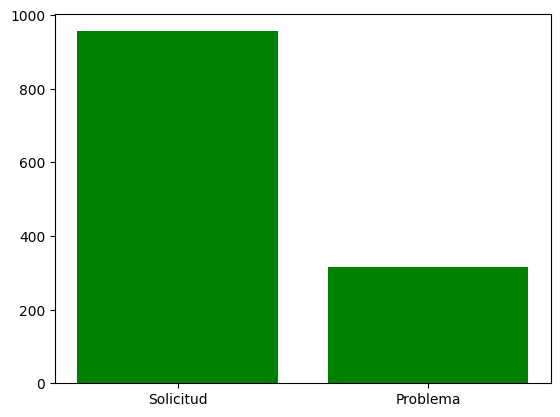

In [35]:
# Obtenemos la gráfica (solo queda cambiar datos)
plt.figure()
plt.bar(df_filtro_hd_conteo['index'], df_filtro_hd_conteo['tipo'], color = 'green')
plt.show()

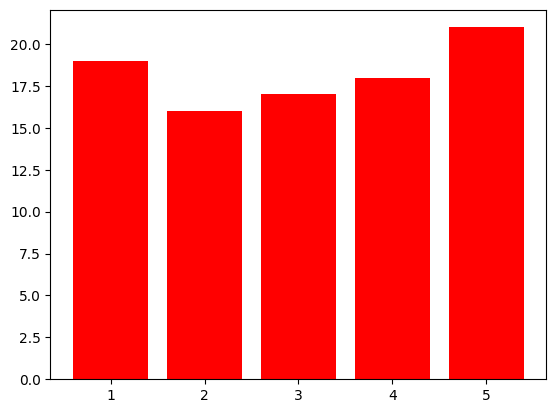

In [36]:
# Sacamos gráfica de satisfacción por los días de resolución
plt.figure()
plt.bar(df_filtro_hd['satisfacción'], df_filtro_hd['días_resolución'], color = "red")
plt.show()

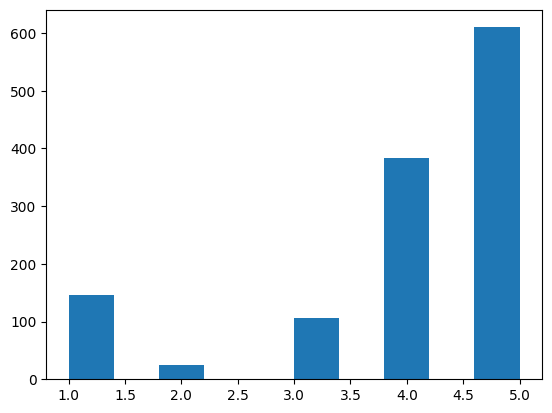

In [37]:
# Para obtener la frecuencia de las satisfacciones, creamos un histograma,que nos permite ver los datos y tener una mejor idea

plt.figure()
plt.hist(df_filtro_hd['satisfacción'])
plt.show()

Como ya hemos dicho en algunas ocasiones, somo analistas de datos y no debemos conformarnos solo con escribir el código y que nos devuelva una gráfica. 

Una vez que hayáis terminado de hacer las gráficas, interpretad los resultados obtenidos de las gráficas creadas en el ejercicio 3 y 4. El objetivo, hacer una comparación entre la categoría "Software" y "Hardware", por ejemplo, ¿están los clientes que tienen problemas de la categoría "Software" más satisfechos que los clientes de la categoría "Hardware".

In [22]:
#interpretación de las diferentes tablas y datos para Hardware y Software.